In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transactions_dataset = pd.read_csv('Transactions.csv')
transactions_dataset['TransactionDate'] = pd.to_datetime(transactions_dataset['TransactionDate'])
products_dataset = pd.read_csv('Products.csv')
customers_dataset = pd.read_csv('Customers.csv')

In [3]:
print(transactions_dataset)
# No of Numerical Features = 3
# No of Indexes = 3
# No of Datetime Features = 1
print(products_dataset)
# No of Numerical Features = 1
# No of Categorical Features = 1
print(customers_dataset)
# No of Datetime Features = 1
# No of Categorical Features = 1

    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0          T00001      C0199      P067 2024-08-25 12:38:23         1   
1          T00112      C0146      P067 2024-05-27 22:23:54         1   
2          T00166      C0127      P067 2024-04-25 07:38:55         1   
3          T00272      C0087      P067 2024-03-26 22:55:37         2   
4          T00363      C0070      P067 2024-03-21 15:10:10         3   
..            ...        ...       ...                 ...       ...   
995        T00496      C0118      P037 2024-10-24 08:30:27         1   
996        T00759      C0059      P037 2024-06-04 02:15:24         3   
997        T00922      C0018      P037 2024-04-05 13:05:32         4   
998        T00959      C0115      P037 2024-09-29 10:16:02         2   
999        T00992      C0024      P037 2024-04-21 10:52:24         1   

     TotalValue   Price  
0        300.68  300.68  
1        300.68  300.68  
2        300.68  300.68  
3        601.36  300.68  
4    

In [4]:
print(f" Null values in Transactions Dataset: \n {transactions_dataset.isnull().sum()}\n\n")
print(f" Null values in Products Dataset:\n {products_dataset.isnull().sum()}\n\n")
print(f" Null values in Customers Dataset: \n{customers_dataset.isnull().sum()}")
#No null values

 Null values in Transactions Dataset: 
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


 Null values in Products Dataset:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


 Null values in Customers Dataset: 
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [5]:
print(transactions_dataset.columns)
print(products_dataset.columns)
print(customers_dataset.columns)

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')
Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')
Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')


In [6]:
print(transactions_dataset.info())
print(products_dataset.info())
print(customers_dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        

In [7]:
dataset = transactions_dataset.merge(products_dataset,on = "ProductID",how = 'left').merge(customers_dataset,on = "CustomerID",how = 'left')
print(dataset)

    TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0          T00001      C0199      P067 2024-08-25 12:38:23         1   
1          T00112      C0146      P067 2024-05-27 22:23:54         1   
2          T00166      C0127      P067 2024-04-25 07:38:55         1   
3          T00272      C0087      P067 2024-03-26 22:55:37         2   
4          T00363      C0070      P067 2024-03-21 15:10:10         3   
..            ...        ...       ...                 ...       ...   
995        T00496      C0118      P037 2024-10-24 08:30:27         1   
996        T00759      C0059      P037 2024-06-04 02:15:24         3   
997        T00922      C0018      P037 2024-04-05 13:05:32         4   
998        T00959      C0115      P037 2024-09-29 10:16:02         2   
999        T00992      C0024      P037 2024-04-21 10:52:24         1   

     TotalValue  Price_x                      ProductName     Category  \
0        300.68   300.68  ComfortLiving Bluetooth Speaker  El

In [8]:
print(dataset.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
ProductName        0
Category           0
Price_y            0
CustomerName       0
Region             0
SignupDate         0
dtype: int64


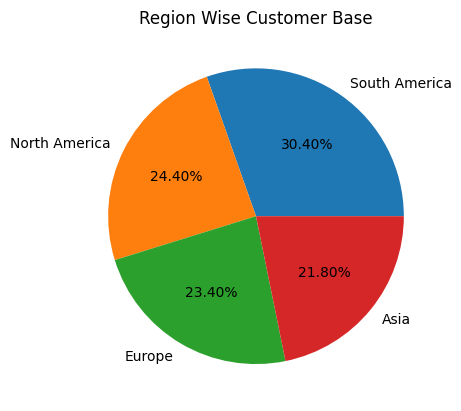

<ipython-input-29-5d0788cdaa6a>:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  regional_revenue = dataset.groupby(['Region']).apply(lambda x: (x['Quantity']*x['Price_x']).sum()).to_dict()


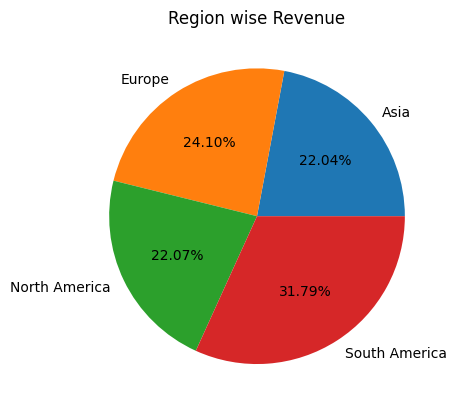

In [29]:
regions = dataset.Region.value_counts().index
regions_values = dataset.Region.value_counts().values
plt.pie(regions_values,labels=regions,autopct='%1.2f%%')
plt.title('Region Wise Customer Base')
plt.show()

regional_revenue = dataset.groupby(['Region']).apply(lambda x: (x['Quantity']*x['Price_x']).sum()).to_dict()
plt.pie(regional_revenue.values(),labels=regional_revenue.keys(),autopct='%1.2f%%')
plt.title('Region wise Revenue')
plt.show()


South America has the largest Customer Base followed by North America, Europe and Asia in order.

South America also has the Largest Revenue Contribution Region wise,followed by Europe, North America, Asia respectively.

      Category  TotalValue
0        Books   192147.47
1     Clothing   166170.66
2  Electronics   180783.50
3   Home Decor   150893.93


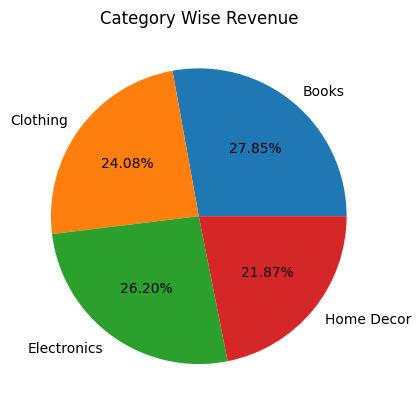

In [34]:
categories = dataset.Category.value_counts().index
categories_values = dataset.Category.value_counts().values
cat_revenue = dataset.groupby(['Category'])['TotalValue'].sum().reset_index()
print(cat_revenue)
plt.pie(cat_revenue['TotalValue'],labels=cat_revenue['Category'],autopct='%1.2f%%')
plt.title('Category Wise Revenue')
plt.show()

Biggest Product Categories are Books followed by Electronics,Home Decor and Clothing in order

<ipython-input-30-728fe8ae9678>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = (dataset.groupby('ProductName').apply(lambda x: (x['Quantity'] * x['Price_x']).sum()).to_dict())


{'ActiveWear Smartwatch': 39096.97, 'SoundWave Headphones': 25211.640000000003, 'SoundWave Novel': 24507.899999999998, 'ActiveWear Jacket': 22712.559999999998, 'ActiveWear Rug': 22314.43, 'TechPro Headphones': 19513.8, 'BookWorld Cookbook': 19221.99, 'BookWorld Sweater': 18743.789999999997, 'TechPro Textbook': 18267.96, 'ActiveWear Cookware Set': 18083.730000000003, 'SoundWave Desk Lamp': 17920.100000000002, 'TechPro Cookbook': 17905.2, 'ActiveWear Textbook': 17257.860000000004, 'HomeSense Desk Lamp': 15701.319999999998, 'SoundWave Cookbook': 15102.719999999998, 'BookWorld Biography': 15080.210000000003, 'HomeSense Novel': 14592.240000000002, 'TechPro T-Shirt': 14264.14, 'ActiveWear Headphones': 13958.34, 'SoundWave Jeans': 13947.199999999999, 'TechPro Smartwatch': 13778.880000000001, 'ComfortLiving Sweater': 13487.95, 'ComfortLiving Smartphone': 13232.12, 'HomeSense Cookware Set': 12078.18, 'ActiveWear Wall Art': 11488.94, 'ActiveWear Jeans': 11161.54, 'TechPro Novel': 11126.040000000

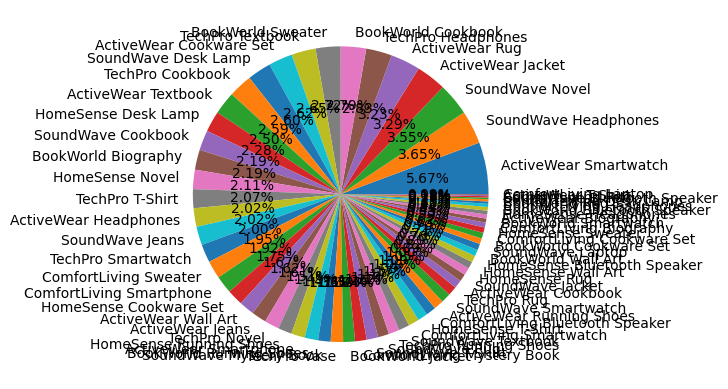

Top 5 Most Revenue Generating Products


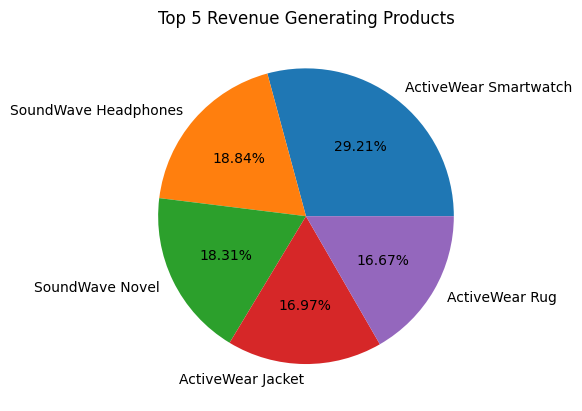

In [30]:
# quantity = dataset.Quantity
# product_names = dataset.ProductName
# prices = dataset.Price_x
# resullt = {}
# for j in range(len(product_names)):
#   if product_names[j] in resullt.keys():
#     resullt[product_names[j]] += quantity[j]*prices[j]
#   else:
#     resullt[product_names[j]] = quantity[j]*prices[j]

result = (dataset.groupby('ProductName').apply(lambda x: (x['Quantity'] * x['Price_x']).sum()).to_dict())

result = dict(sorted(result.items(), key=lambda x: x[1], reverse=True))
print(result)

plt.pie(list(result.values()),labels=list(result.keys()),autopct='%1.2f%%')
plt.show()
print("Top 5 Most Revenue Generating Products")
plt.pie(list(result.values())[:5],labels=list(result.keys())[:5],autopct='%1.2f%%')
plt.title('Top 5 Revenue Generating Products')
plt.show()

ActiveWear Smartwatch is the most Revenue Generating Product contributing to 5.67% of Total Revenue

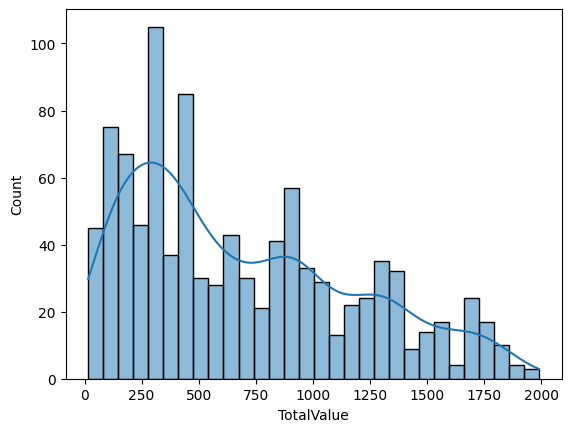

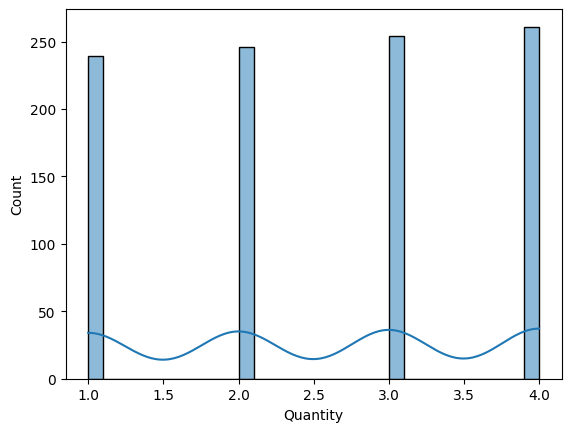

In [12]:
sns.histplot(dataset['TotalValue'],bins = 30,kde=True)
plt.show()
sns.histplot(dataset['Quantity'],bins = 30,kde=True)
plt.show()

Majority of Orders are in 0-500$ range and the trend goes down as the Transaction Value increases.

Customers also prefer to buy in bulk.

In [13]:
correlation_matrix = dataset[['Quantity', 'Price_x', 'TotalValue']].corr()
print(correlation_matrix)


            Quantity   Price_x  TotalValue
Quantity    1.000000 -0.009378    0.609972
Price_x    -0.009378  1.000000    0.722714
TotalValue  0.609972  0.722714    1.000000


SignupYear
2022          NaN
2023   -15.361446
2024    37.722420
Name: count, dtype: float64


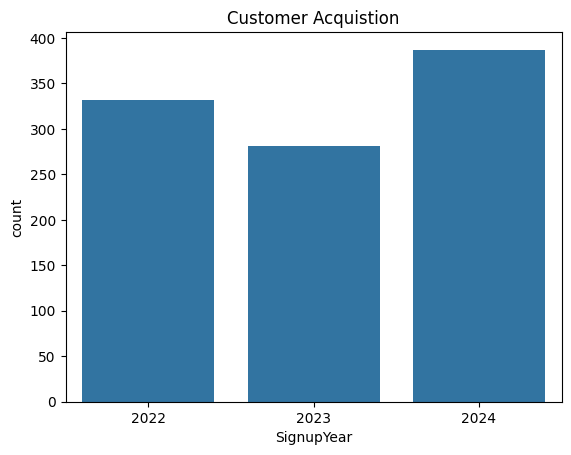

In [35]:
dataset['SignupDate'] = pd.to_datetime(dataset['SignupDate'])
dataset['SignupYear'] = dataset['SignupDate'].dt.year
values = dataset['SignupYear'].value_counts().sort_index()
growth = values.pct_change()*100
print(growth)
sns.countplot(x='SignupYear',data=dataset)
plt.title('Customer Acquistion')
plt.show()

Customer Acquisition has gone up by 37.7% in the year 2024, but the year 2023 saw a decline of 15%

TransactionMonth
1           NaN
2    -28.037383
3      3.896104
4      7.500000
5      0.000000
6    -19.767442
7     39.130435
8     -2.083333
9      2.127660
10   -27.083333
11   -18.571429
12    43.859649
Name: count, dtype: float64


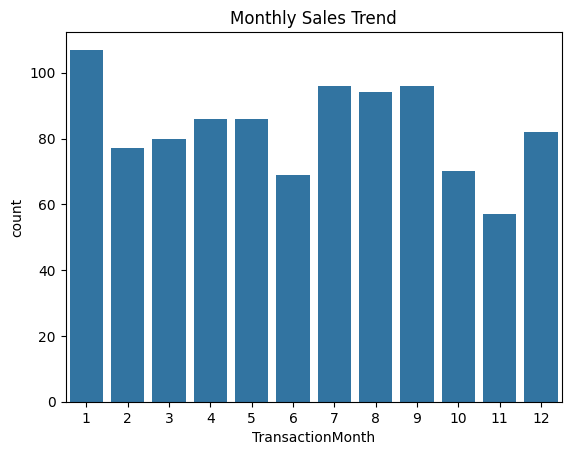

In [36]:
dataset['TransactionDate'] = pd.to_datetime(dataset['TransactionDate'])
dataset['TransactionMonth'] = dataset['TransactionDate'].dt.month
values = dataset['TransactionMonth'].value_counts().sort_index()
growth = values.pct_change()*100
print(growth)
sns.countplot(x='TransactionMonth',data = dataset)
plt.title('Monthly Sales Trend')
plt.show()

Highest Sales is seen in January probably due to New Year.July to Sepetember is also a great period for sales while November is the worst month for sales in the Year.|

TransactionWeekday
Friday             NaN
Monday       11.200000
Saturday     -9.352518
Sunday       10.317460
Thursday      7.913669
Tuesday       8.666667
Wednesday    -3.067485
Name: count, dtype: float64


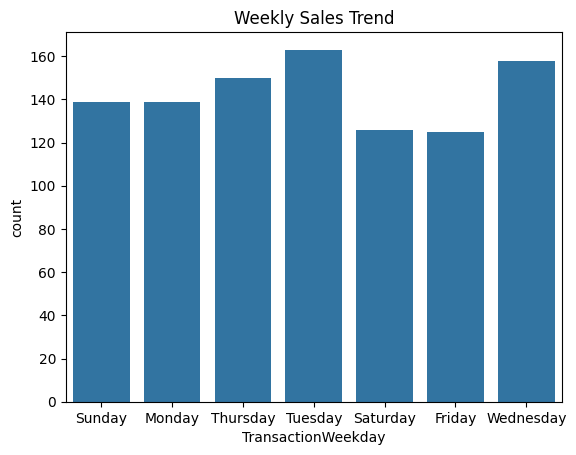

In [37]:
dataset['TransactionDate'] = pd.to_datetime(dataset['TransactionDate'])
dataset['TransactionWeekday'] = dataset['TransactionDate'].dt.day_name()
values = dataset['TransactionWeekday'].value_counts().sort_index()
growth = values.pct_change()*100
print(growth)
sns.countplot(x='TransactionWeekday',data = dataset)
plt.title('Weekly Sales Trend')
plt.show()

Weekends see relatively less Transactions, Whereas weekdays are quite good for Sales.

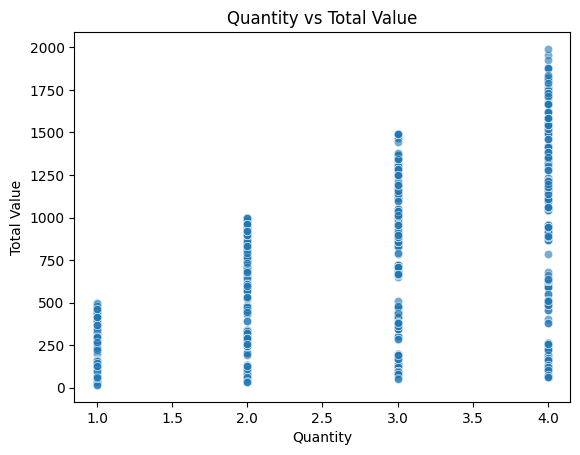

In [17]:
sns.scatterplot(x='Quantity', y='TotalValue', data=dataset, alpha=0.6)
plt.title('Quantity vs Total Value')
plt.xlabel('Quantity')
plt.ylabel('Total Value')
plt.show()


In [18]:
import datetime
last_purchase_customers = dataset.groupby('CustomerID')['TransactionDate'].max().reset_index()
days_since_last_purchase = datetime.datetime.now() - last_purchase_customers['TransactionDate']
last_purchase_customers['DaysSinceLastPurchase'] = days_since_last_purchase.dt.days
last_purchase_customers = last_purchase_customers.sort_values(by='DaysSinceLastPurchase')
last_purchase_customers

,CustomerID,TransactionDate,DaysSinceLastPurchase
195,C0197,2024-12-27 18:20:31,27
100,C0101,2024-12-28 11:00:00,27
179,C0181,2024-12-27 17:31:24,27
118,C0119,2024-12-26 21:34:07,28
164,C0165,2024-12-26 06:46:12,29
...,...,...,...
79,C0080,2024-03-12 15:48:24,318
57,C0058,2024-02-01 14:24:48,358
19,C0020,2024-01-30 00:57:29,360
13,C0014,2024-01-17 18:31:55,372


Some Customers have gone over a year since making a purchase we could Target them with a Coupon Code

            Recency  Frequency  Monetary
CustomerID                              
C0001            82          5   3354.52
C0002            52          4   1862.74
C0003           152          4   2725.38
C0004            32          8   5354.88
C0005            81          3   2034.24


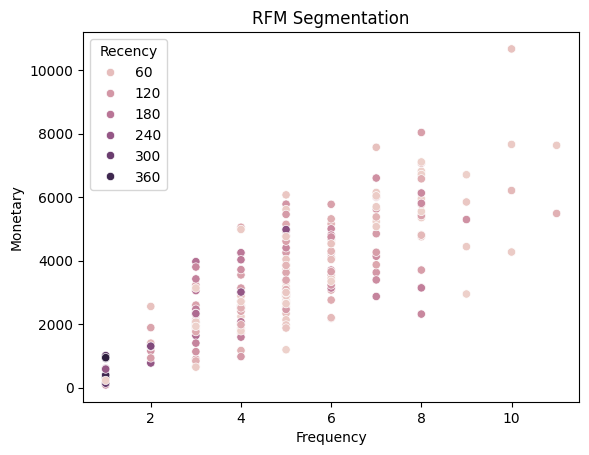

In [19]:
rfm = dataset.groupby('CustomerID').agg({
    'TransactionDate': lambda x: (datetime.datetime.now() - x.max()).days,
    'TransactionID': 'count',
    'TotalValue': 'sum'
}).rename(columns={
    'TransactionDate': 'Recency',
    'TransactionID': 'Frequency',
    'TotalValue': 'Monetary'
})
print(rfm.head())
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Recency')
plt.title('RFM Segmentation')
plt.show()

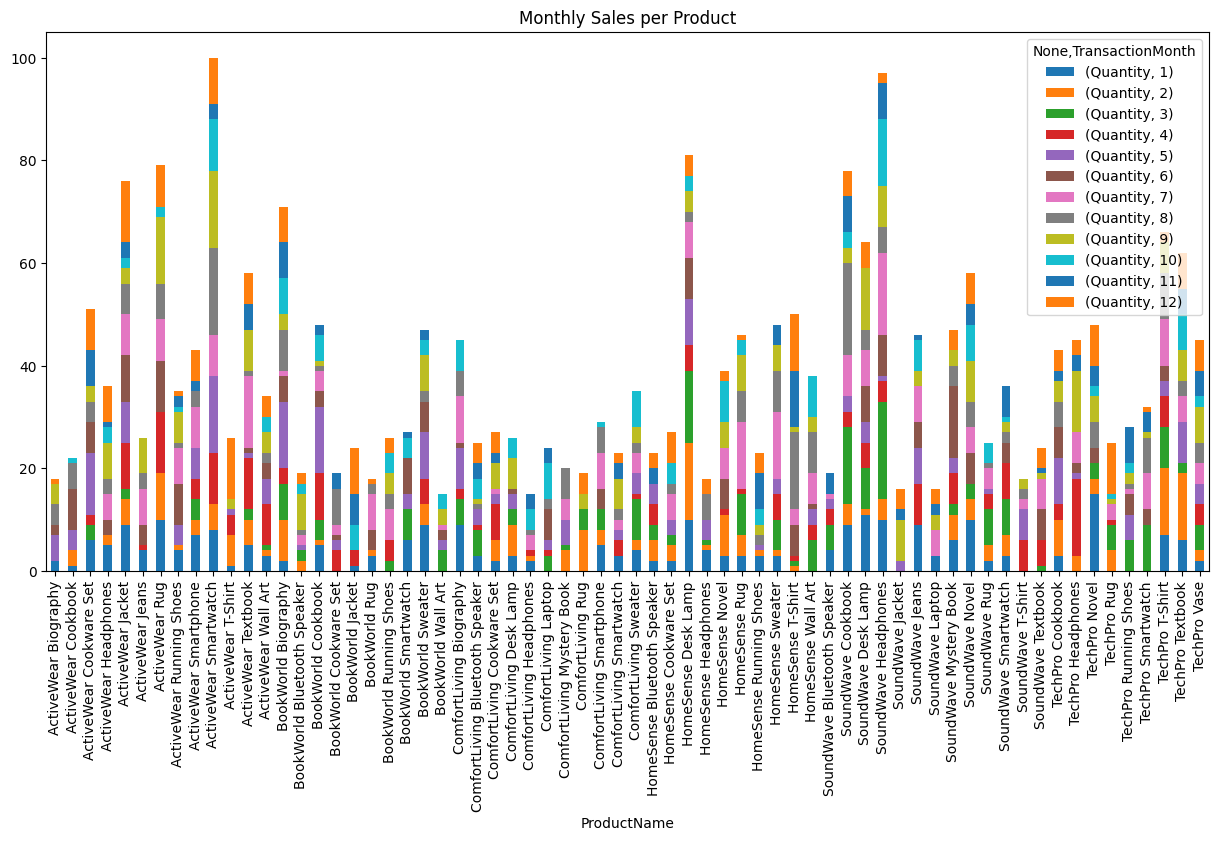

In [20]:
product_sales = dataset.groupby(['ProductName', 'TransactionMonth']).agg({'Quantity': 'sum'}).unstack().fillna(0)
product_sales.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Monthly Sales per Product')
plt.show()


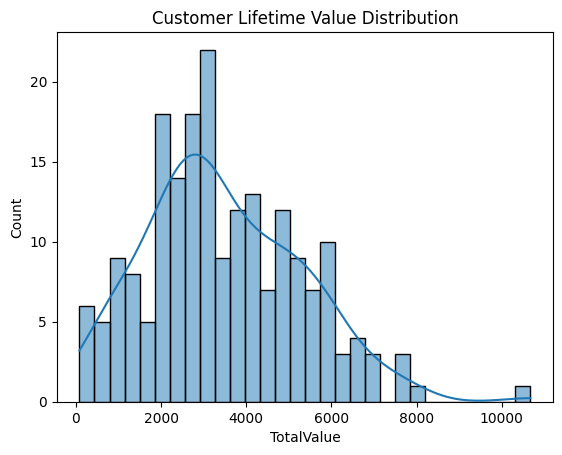

In [21]:
clv = dataset.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
sns.histplot(clv, bins=30, kde=True)
plt.title('Customer Lifetime Value Distribution')
plt.show()


In [22]:
repeat_rate = dataset.groupby('CustomerID').size().value_counts(normalize=True).iloc[1:].sum()
print(f"Repeat Purchase Rate: {repeat_rate * 100:.2f}%")

Repeat Purchase Rate: 78.89%


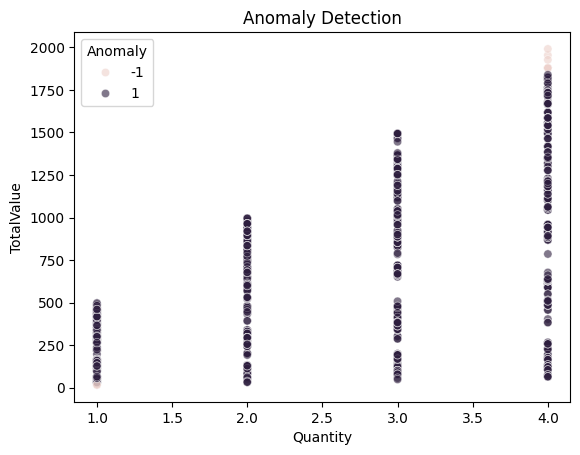

In [23]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.01, random_state=42)
dataset['Anomaly'] = iso.fit_predict(dataset[['TotalValue', 'Quantity']])
sns.scatterplot(data=dataset, x='Quantity', y='TotalValue', hue='Anomaly', alpha=0.6)
plt.title('Anomaly Detection')
plt.show()


In [28]:
churners = last_purchase_customers[last_purchase_customers['DaysSinceLastPurchase'] > 365]
print("Potential Churners:\n", churners)


Potential Churners:
     CustomerID     TransactionDate  DaysSinceLastPurchase
13       C0014 2024-01-17 18:31:55                    372
109      C0110 2024-01-02 19:11:34                    387
